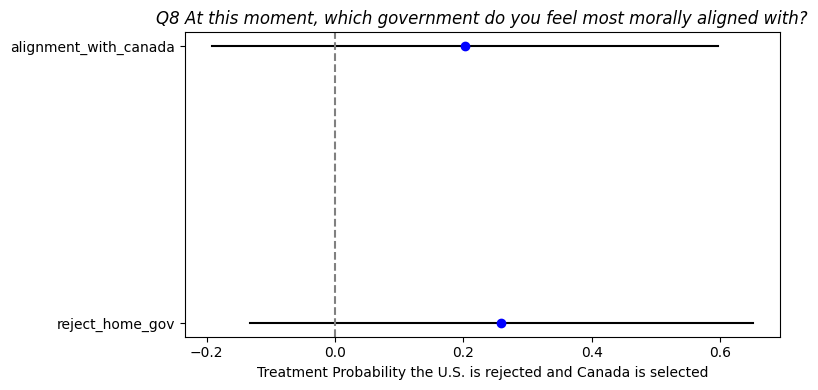

In [2]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load the data with correct encoding
df = pd.read_csv("QSurvey_Synthetic.csv", encoding="cp1252")

# Keep only relevant groups
df = df[df['FL_22_DO'].isin(['FL_23', 'FL_24'])]
df['treatment'] = df['FL_22_DO'].apply(lambda x: 1 if x == 'FL_24' else 0)

# Create binary outcomes
df['reject_home_gov'] = df['Q8'].isin(['Other', 'Neither','Canada']).astype(int)
df['alignment_with_canada'] = (df['Q8'] == 'Canada').astype(int)

# Store results for plotting
results = []

for dv in ['reject_home_gov', 'alignment_with_canada']:
    X = sm.add_constant(df['treatment'])
    y = df[dv]
    model = sm.Logit(y, X).fit(disp=0)
    coef = model.params['treatment']
    err = model.bse['treatment']
    ci_low = coef - 1.96 * err
    ci_high = coef + 1.96 * err
    results.append({
        'DV': dv,
        'Coef': coef,
        'CI_lower': ci_low,
        'CI_upper': ci_high
    })

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Plot
plt.figure(figsize=(8, 4))
for idx, row in results_df.iterrows():
    plt.plot([row['CI_lower'], row['CI_upper']], [idx, idx], color='black')  # CI line
    plt.plot(row['Coef'], idx, 'o', color='blue')  # Coefficient point

plt.axvline(0, color='gray', linestyle='--')
plt.yticks(range(len(results_df)), results_df['DV'])
plt.xlabel("Treatment Probability the U.S. is rejected and Canada is selected")
plt.title("Q8 At this moment, which government do you feel most morally aligned with?", fontdict={'fontstyle': 'italic'})
plt.tight_layout()
plt.show()


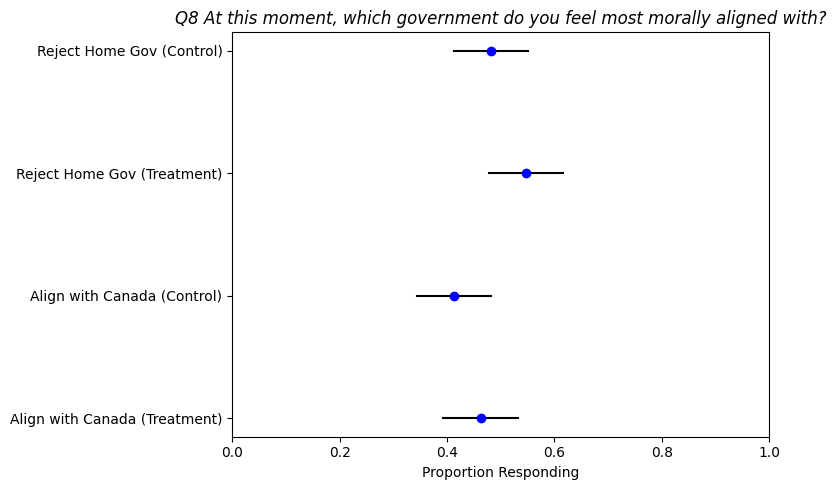

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import sem  # standard error of the mean

# Load and filter data
df = pd.read_csv("QSurvey_Synthetic.csv", encoding="cp1252")
df = df[df['FL_22_DO'].isin(['FL_23', 'FL_24'])]
df['group'] = df['FL_22_DO'].map({'FL_23': 'Control', 'FL_24': 'Treatment'})

# Create binary outcomes
df['reject_home_gov'] = df['Q8'].isin(['Other', 'Neither', 'Canada']).astype(int)
df['align_canada'] = (df['Q8'] == 'Canada').astype(int)

# Prepare data for plotting
plot_data = []

for outcome in ['reject_home_gov', 'align_canada']:
    for group_name, group_df in df.groupby('group'):
        mean = group_df[outcome].mean()
        error = sem(group_df[outcome])
        plot_data.append({
            'Outcome': outcome,
            'Group': group_name,
            'Proportion': mean,
            'CI_low': mean - 1.96 * error,
            'CI_high': mean + 1.96 * error
        })

plot_df = pd.DataFrame(plot_data)

# Custom y-axis positions for grouping
y_labels = {'reject_home_gov': "Reject Home Gov", 'align_canada': "Align with Canada"}
plot_df['Label'] = plot_df['Outcome'].map(y_labels) + " (" + plot_df['Group'] + ")"
plot_df['y'] = list(range(len(plot_df)))[::-1]  # reverse order for top-down

# Plot
plt.figure(figsize=(8, 5))
for _, row in plot_df.iterrows():
    plt.plot([row['CI_low'], row['CI_high']], [row['y'], row['y']], color='black')  # error bar
    plt.plot(row['Proportion'], row['y'], 'o', color='blue')  # point

plt.yticks(plot_df['y'], plot_df['Label'])
plt.axvline(0, color='gray', linestyle='--', linewidth=0.8)
plt.xlim(0, 1)
plt.xlabel("Proportion Responding")
plt.title("Q8 At this moment, which government do you feel most morally aligned with?", fontdict={'fontstyle': 'italic'})
plt.tight_layout()
plt.show()


In [4]:
import statsmodels.api as sm

# Load data
df = pd.read_csv("QSurvey_Synthetic.csv", encoding="cp1252")

# Keep only relevant groups
df = df[df['FL_22_DO'].isin(['FL_23', 'FL_24'])]
df['treatment'] = df['FL_22_DO'].apply(lambda x: 1 if x == 'FL_24' else 0)

# Define binary outcomes
df['reject_home_gov'] = df['Q8'].isin(['Other', 'Neither', 'Canada']).astype(int)
df['align_canada'] = (df['Q8'] == 'Canada').astype(int)

# Function to run and print logistic regression
def run_logit(dv_name):
    X = sm.add_constant(df['treatment'])
    y = df[dv_name]
    model = sm.Logit(y, X).fit(disp=0)
    print(f"\nLogistic Regression Results: {dv_name}")
    print(model.summary())
    return model

# Run models
model_reject = run_logit('reject_home_gov')
model_align = run_logit('align_canada')


Logistic Regression Results: reject_home_gov
                           Logit Regression Results                           
Dep. Variable:        reject_home_gov   No. Observations:                  402
Model:                          Logit   Df Residuals:                      400
Method:                           MLE   Df Model:                            1
Date:                Tue, 15 Jul 2025   Pseudo R-squ.:                0.003024
Time:                        13:10:53   Log-Likelihood:                -277.62
converged:                       True   LL-Null:                       -278.47
Covariance Type:            nonrobust   LLR p-value:                    0.1944
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0697      0.141     -0.494      0.622      -0.346       0.207
treatment      0.2593      0.200      1.296      0.195      -0.133       0.651

Logis

In [5]:
# Q9
# Recreate treatment variable if it's missing
df = df[df['FL_22_DO'].isin(['FL_23', 'FL_24'])]  # Filter to control and treatment
df['treatment'] = df['FL_22_DO'].apply(lambda x: 1 if x == 'FL_24' else 0)

# Binary DV for Q9: defensive nationalism = agree or strongly agree
agree_levels = ['Somewhat agree', 'Strongly agree']
df['defensive_response'] = df['Q9'].isin(agree_levels).astype(int)

# Run logistic regression
X = sm.add_constant(df['treatment'])
y = df['defensive_response']
model_q9 = sm.Logit(y, X).fit(disp=0)

print("\nLogistic Regression Results: defensive_response (Q9)")
print(model_q9.summary())

# Descriptive stats
control_mean = df[df['treatment'] == 0]['defensive_response'].mean()
treat_mean = df[df['treatment'] == 1]['defensive_response'].mean()
print(f"\nProportion defensive in control: {control_mean:.2%}")
print(f"Proportion defensive in treatment: {treat_mean:.2%}")



Logistic Regression Results: defensive_response (Q9)
                           Logit Regression Results                           
Dep. Variable:     defensive_response   No. Observations:                  402
Model:                          Logit   Df Residuals:                      400
Method:                           MLE   Df Model:                            1
Date:                Tue, 15 Jul 2025   Pseudo R-squ.:                0.002175
Time:                        13:10:53   Log-Likelihood:                -277.32
converged:                       True   LL-Null:                       -277.93
Covariance Type:            nonrobust   LLR p-value:                    0.2715
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0100      0.141     -0.071      0.944      -0.286       0.267
treatment     -0.2199      0.200     -1.099      0.272      -0.612       0.17

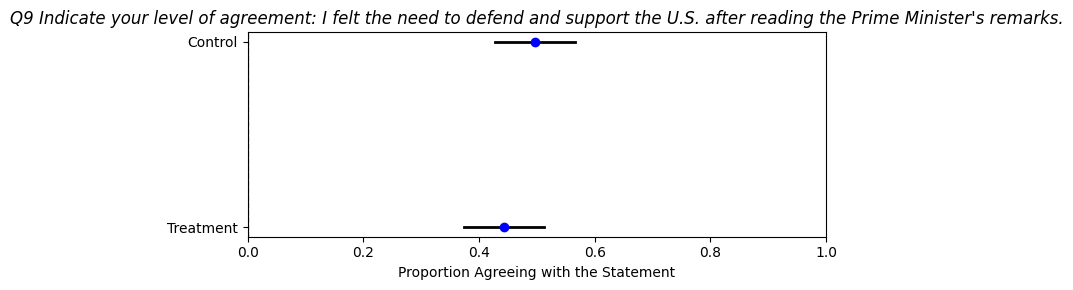

In [6]:
# If needed, recreate group variable
df['group'] = df['treatment'].map({0: 'Control', 1: 'Treatment'})

# Recalculate proportion defensive for each group
group_stats_q9 = df.groupby('group')['defensive_response'].agg(['mean', sem]).reset_index()
group_stats_q9.columns = ['Group', 'Proportion', 'SE']
group_stats_q9['CI_low'] = group_stats_q9['Proportion'] - 1.96 * group_stats_q9['SE']
group_stats_q9['CI_high'] = group_stats_q9['Proportion'] + 1.96 * group_stats_q9['SE']
group_stats_q9['y'] = [1, 0]  # so treatment is on top

# Plot
plt.figure(figsize=(7, 3))
for _, row in group_stats_q9.iterrows():
    plt.plot([row['CI_low'], row['CI_high']], [row['y'], row['y']], color='black', lw=2)
    plt.plot(row['Proportion'], row['y'], 'o', color='blue')

plt.yticks([0, 1], group_stats_q9.sort_values('y')['Group'])
plt.axvline(0, color='gray', linestyle='--', linewidth=1)
plt.xlim(0, 1)
plt.xlabel("Proportion Agreeing with the Statement")
plt.title("Q9 Indicate your level of agreement: I felt the need to defend and support the U.S. after reading the Prime Minister's remarks.", fontdict={'fontstyle': 'italic'})
plt.tight_layout()
plt.show()


Logistic Regression Results: felt_understood (Q10)
                           Logit Regression Results                           
Dep. Variable:        felt_understood   No. Observations:                  402
Model:                          Logit   Df Residuals:                      400
Method:                           MLE   Df Model:                            1
Date:                Tue, 15 Jul 2025   Pseudo R-squ.:               3.303e-05
Time:                        13:10:53   Log-Likelihood:                -215.00
converged:                       True   LL-Null:                       -215.01
Covariance Type:            nonrobust   LLR p-value:                    0.9051
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2432      0.169      7.347      0.000       0.912       1.575
treatment     -0.0284      0.238     -0.119      0.905      -0.496       0.439


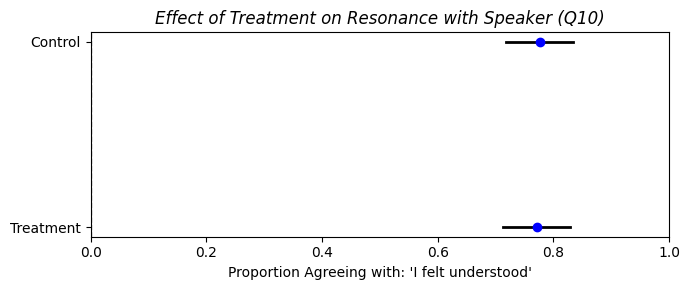

In [7]:
# Step 1: Define binary DV for Q10
agree_levels_q10 = ['Somewhat agree', 'Strongly agree']
df['felt_understood'] = df['Q10'].isin(agree_levels_q10).astype(int)

# Step 2: Logistic regression
X = sm.add_constant(df['treatment'])
y = df['felt_understood']
model_q10 = sm.Logit(y, X).fit(disp=0)

print("\nLogistic Regression Results: felt_understood (Q10)")
print(model_q10.summary())

# Step 3: Descriptive stats by group
control_mean_q10 = df[df['treatment'] == 0]['felt_understood'].mean()
treat_mean_q10 = df[df['treatment'] == 1]['felt_understood'].mean()
print(f"\nProportion feeling understood in control: {control_mean_q10:.2%}")
print(f"Proportion feeling understood in treatment: {treat_mean_q10:.2%}")

# Reuse group label
df['group'] = df['treatment'].map({0: 'Control', 1: 'Treatment'})

# Group means and error bars
from scipy.stats import sem
group_stats_q10 = df.groupby('group')['felt_understood'].agg(['mean', sem]).reset_index()
group_stats_q10.columns = ['Group', 'Proportion', 'SE']
group_stats_q10['CI_low'] = group_stats_q10['Proportion'] - 1.96 * group_stats_q10['SE']
group_stats_q10['CI_high'] = group_stats_q10['Proportion'] + 1.96 * group_stats_q10['SE']
group_stats_q10['y'] = [1, 0]

# Plot
plt.figure(figsize=(7, 3))
for _, row in group_stats_q10.iterrows():
    plt.plot([row['CI_low'], row['CI_high']], [row['y'], row['y']], color='black', lw=2)
    plt.plot(row['Proportion'], row['y'], 'o', color='blue')

plt.yticks([0, 1], group_stats_q10.sort_values('y')['Group'])
plt.axvline(0, color='gray', linestyle='--', linewidth=1)
plt.xlim(0, 1)
plt.xlabel("Proportion Agreeing with: 'I felt understood'")
plt.title("Effect of Treatment on Resonance with Speaker (Q10)", fontdict={'fontstyle': 'italic'})
plt.tight_layout()
plt.show()




Logistic Regression Results: believed_sincere (Q11)
                           Logit Regression Results                           
Dep. Variable:       believed_sincere   No. Observations:                  402
Model:                          Logit   Df Residuals:                      400
Method:                           MLE   Df Model:                            1
Date:                Tue, 15 Jul 2025   Pseudo R-squ.:               0.0007649
Time:                        13:10:53   Log-Likelihood:                -221.96
converged:                       True   LL-Null:                       -222.13
Covariance Type:            nonrobust   LLR p-value:                    0.5599
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2148      0.168      7.235      0.000       0.886       1.544
treatment     -0.1360      0.233     -0.583      0.560      -0.593       0.321

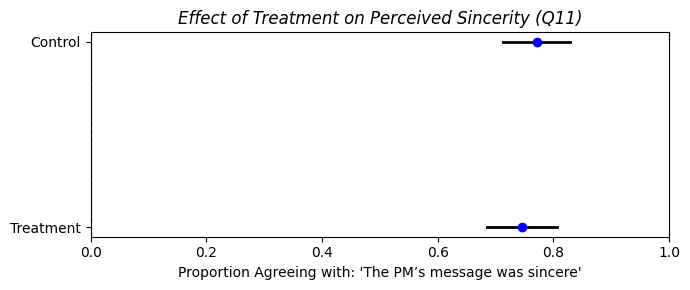

In [8]:
# Step 1: Create binary DV
agree_levels_q11 = ['Somewhat agree', 'Strongly agree']
df['believed_sincere'] = df['Q11'].isin(agree_levels_q11).astype(int)

# Step 2: Logistic regression
X = sm.add_constant(df['treatment'])
y = df['believed_sincere']
model_q11 = sm.Logit(y, X).fit(disp=0)

print("\nLogistic Regression Results: believed_sincere (Q11)")
print(model_q11.summary())

# Step 3: Descriptive statistics
control_mean_q11 = df[df['treatment'] == 0]['believed_sincere'].mean()
treat_mean_q11 = df[df['treatment'] == 1]['believed_sincere'].mean()
print(f"\nProportion trusting the speaker in control: {control_mean_q11:.2%}")
print(f"Proportion trusting the speaker in treatment: {treat_mean_q11:.2%}")

# Group stats
group_stats_q11 = df.groupby('group')['believed_sincere'].agg(['mean', sem]).reset_index()
group_stats_q11.columns = ['Group', 'Proportion', 'SE']
group_stats_q11['CI_low'] = group_stats_q11['Proportion'] - 1.96 * group_stats_q11['SE']
group_stats_q11['CI_high'] = group_stats_q11['Proportion'] + 1.96 * group_stats_q11['SE']
group_stats_q11['y'] = [1, 0]

# Plot
plt.figure(figsize=(7, 3))
for _, row in group_stats_q11.iterrows():
    plt.plot([row['CI_low'], row['CI_high']], [row['y'], row['y']], color='black', lw=2)
    plt.plot(row['Proportion'], row['y'], 'o', color='blue')

plt.yticks([0, 1], group_stats_q11.sort_values('y')['Group'])
plt.axvline(0, color='gray', linestyle='--', linewidth=1)
plt.xlim(0, 1)
plt.xlabel("Proportion Agreeing with: 'The PM’s message was sincere'")
plt.title("Effect of Treatment on Perceived Sincerity (Q11)", fontdict={'fontstyle': 'italic'})
plt.tight_layout()
plt.show()


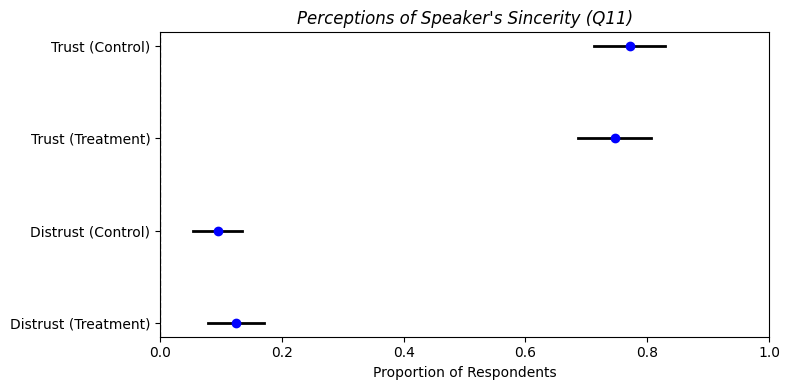

In [9]:
# Define trust and distrust categories
trust = ['Somewhat agree', 'Strongly agree']
distrust = ['Somewhat disagree', 'Strongly disagree']

# Create binary DVs
df['trust_pm'] = df['Q11'].isin(trust).astype(int)
df['distrust_pm'] = df['Q11'].isin(distrust).astype(int)

# Group labels (if not already present)
df['group'] = df['treatment'].map({0: 'Control', 1: 'Treatment'})

# Compute group stats
def get_group_stats(varname, label):
    stats = df.groupby('group')[varname].agg(['mean', sem]).reset_index()
    stats.columns = ['Group', 'Proportion', 'SE']
    stats['CI_low'] = stats['Proportion'] - 1.96 * stats['SE']
    stats['CI_high'] = stats['Proportion'] + 1.96 * stats['SE']
    stats['Measure'] = label
    return stats

trust_stats = get_group_stats('trust_pm', 'Trust')
distrust_stats = get_group_stats('distrust_pm', 'Distrust')

# Combine
plot_df = pd.concat([trust_stats, distrust_stats], ignore_index=True)
plot_df['y'] = list(range(len(plot_df)))[::-1]  # vertical position

# Plot
plt.figure(figsize=(8, 4))
for _, row in plot_df.iterrows():
    plt.plot([row['CI_low'], row['CI_high']], [row['y'], row['y']], color='black', lw=2)
    plt.plot(row['Proportion'], row['y'], 'o', color='blue')

# Format axes
ytick_labels = plot_df['Measure'] + " (" + plot_df['Group'] + ")"
plt.yticks(plot_df['y'], ytick_labels)
plt.axvline(0, color='gray', linestyle='--', linewidth=1)
plt.xlim(0, 1)
plt.xlabel("Proportion of Respondents")
plt.title("Perceptions of Speaker's Sincerity (Q11)", fontdict={'fontstyle': 'italic'})
plt.tight_layout()
plt.show()


In [10]:
# Step 1: Define the binary DV for distrust
distrust_levels_q11 = ['Somewhat disagree', 'Strongly disagree']
df['distrusted_speaker'] = df['Q11'].isin(distrust_levels_q11).astype(int)

# Step 2: Logistic regression
X = sm.add_constant(df['treatment'])
y = df['distrusted_speaker']
model_q11_distrust = sm.Logit(y, X).fit(disp=0)

print("\nLogistic Regression Results: distrusted_speaker (Q11)")
print(model_q11_distrust.summary())

# Step 3: Descriptive stats
control_mean_distrust = df[df['treatment'] == 0]['distrusted_speaker'].mean()
treat_mean_distrust = df[df['treatment'] == 1]['distrusted_speaker'].mean()
print(f"\nProportion distrusting the speaker in control: {control_mean_distrust:.2%}")
print(f"Proportion distrusting the speaker in treatment: {treat_mean_distrust:.2%}")



Logistic Regression Results: distrusted_speaker (Q11)
                           Logit Regression Results                           
Dep. Variable:     distrusted_speaker   No. Observations:                  402
Model:                          Logit   Df Residuals:                      400
Method:                           MLE   Df Model:                            1
Date:                Tue, 15 Jul 2025   Pseudo R-squ.:                0.003318
Time:                        13:10:53   Log-Likelihood:                -138.38
converged:                       True   LL-Null:                       -138.84
Covariance Type:            nonrobust   LLR p-value:                    0.3371
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.2596      0.241     -9.372      0.000      -2.732      -1.787
treatment      0.3080      0.322      0.956      0.339      -0.324       0.9

In [11]:
# Define binary DV for Q12: 1 if agreed or strongly agreed
agree_levels_q12 = ['Somewhat disagree', 'Strongly disagree,']
df['accepts_right_to_comment'] = df['Q12'].isin(agree_levels_q12).astype(int)

# Logistic regression
X = sm.add_constant(df['treatment'])
y = df['accepts_right_to_comment']
model_q12 = sm.Logit(y, X).fit(disp=0)

print("\nLogistic Regression Results: accepts_right_to_comment (Q12)")
print(model_q12.summary())

# Descriptive stats
control_mean_q12 = df[df['treatment'] == 0]['accepts_right_to_comment'].mean()
treat_mean_q12 = df[df['treatment'] == 1]['accepts_right_to_comment'].mean()
print(f"\nProportion supporting PM's right in control: {control_mean_q12:.2%}")
print(f"Proportion supporting PM's right in treatment: {treat_mean_q12:.2%}")



Logistic Regression Results: accepts_right_to_comment (Q12)
                              Logit Regression Results                              
Dep. Variable:     accepts_right_to_comment   No. Observations:                  402
Model:                                Logit   Df Residuals:                      400
Method:                                 MLE   Df Model:                            1
Date:                      Tue, 15 Jul 2025   Pseudo R-squ.:               1.760e-12
Time:                              13:10:53   Log-Likelihood:                -85.306
converged:                             True   LL-Null:                       -85.306
Covariance Type:                  nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.8491      0.310     -9.187      0.000      -3.457      -2.241
treatment   1.642e-15 

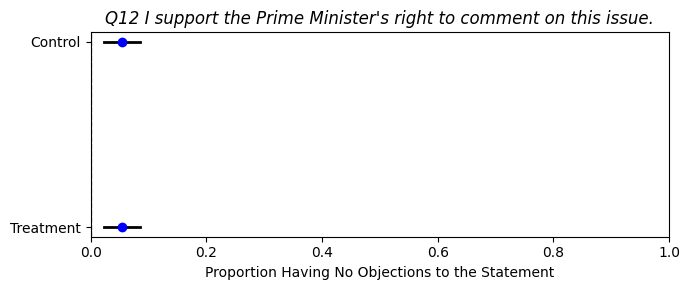

In [12]:
from scipy.stats import sem
import matplotlib.pyplot as plt

# Label groups (if not already done)
df['group'] = df['treatment'].map({0: 'Control', 1: 'Treatment'})

# Group stats
group_stats_q12 = df.groupby('group')['accepts_right_to_comment'].agg(['mean', sem]).reset_index()
group_stats_q12.columns = ['Group', 'Proportion', 'SE']
group_stats_q12['CI_low'] = group_stats_q12['Proportion'] - 1.96 * group_stats_q12['SE']
group_stats_q12['CI_high'] = group_stats_q12['Proportion'] + 1.96 * group_stats_q12['SE']
group_stats_q12['y'] = [1, 0]  # Treatment on top

# Plot
plt.figure(figsize=(7, 3))
for _, row in group_stats_q12.iterrows():
    plt.plot([row['CI_low'], row['CI_high']], [row['y'], row['y']], color='black', lw=2)
    plt.plot(row['Proportion'], row['y'], 'o', color='blue')

plt.yticks([0, 1], group_stats_q12.sort_values('y')['Group'])
plt.axvline(0, color='gray', linestyle='--', linewidth=1)
plt.xlim(0, 1)
plt.xlabel("Proportion Having No Objections to the Statement")
plt.title("Q12 I support the Prime Minister's right to comment on this issue.", fontdict={'fontstyle': 'italic'})
plt.tight_layout()
plt.show()


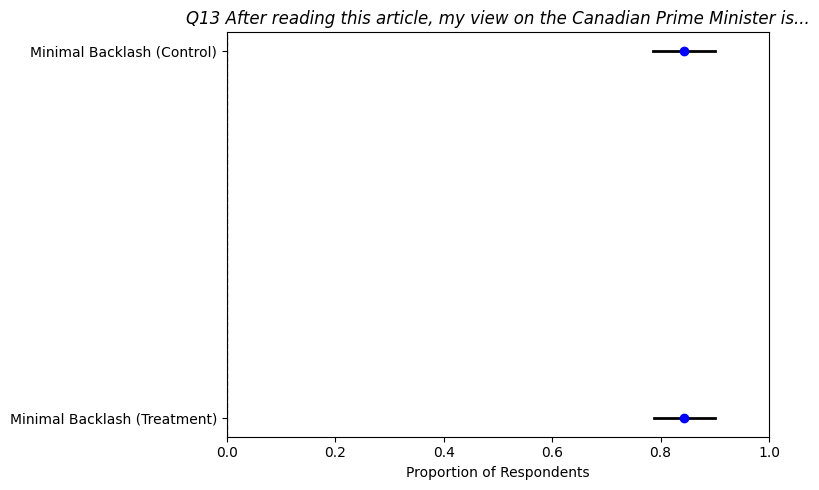

Optimization terminated successfully.
         Current function value: 0.434223
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:       minimal_backlash   No. Observations:                  319
Model:                          Logit   Df Residuals:                      317
Method:                           MLE   Df Model:                            1
Date:                Tue, 15 Jul 2025   Pseudo R-squ.:               2.103e-06
Time:                        14:59:11   Log-Likelihood:                -138.52
converged:                       True   LL-Null:                       -138.52
Covariance Type:            nonrobust   LLR p-value:                    0.9807
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6790      0.218      7.707      0.000       1.252       2.106
treatment      0.0074      0.

In [27]:
#Q13

def sentiment_q13(response):
    if response in ['Somewhat negative', 'Extremely negative']:
        return 'Backlash'
    elif response in ['Neither positive nor negative', 'Somewhat positive', 'Extremely positive']:
        return 'Minimal Backlash'
    else:
        return None

df['q13_sentiment'] = df['Q13'].apply(sentiment_q13)
df = df[df['q13_sentiment'].notna()]  # Remove missing or unclassified

sentiments = ['Minimal Backlash']
rows = []

for sentiment in sentiments:
    for group in ['Control', 'Treatment']:
        subset = df[(df['q13_sentiment'] == sentiment) & (df['group'] == group)]
        total = df[df['group'] == group].shape[0]
        proportion = len(subset) / total
        error = sem([1]*len(subset) + [0]*(total - len(subset)))
        ci_low = proportion - 1.96 * error
        ci_high = proportion + 1.96 * error
        rows.append({
            'Sentiment': sentiment,
            'Group': group,
            'Proportion': proportion,
            'CI_low': ci_low,
            'CI_high': ci_high
        })

plot_df = pd.DataFrame(rows)
plot_df['y'] = list(range(len(plot_df)))[::-1]  # vertical positioning

# Step 3: Coefficient-style plot
plt.figure(figsize=(8, 5))
for _, row in plot_df.iterrows():
    plt.plot([row['CI_low'], row['CI_high']], [row['y'], row['y']], color='black', lw=2)
    plt.plot(row['Proportion'], row['y'], 'o', color='blue')

ytick_labels = plot_df['Sentiment'] + " (" + plot_df['Group'] + ")"
plt.yticks(plot_df['y'], ytick_labels)
plt.axvline(0, color='gray', linestyle='--', linewidth=1)
plt.xlim(0, 1)
plt.xlabel("Proportion of Respondents")
plt.title("Q13 After reading this article, my view on the Canadian Prime Minister is...", fontdict={'fontstyle': 'italic'})
plt.tight_layout()
plt.show()

#Prep regression
df['minimal_backlash'] = df['q13_sentiment'].map({
    'Minimal Backlash': 1,
    'Backlash': 0
})

reg_df = df[['minimal_backlash', 'treatment']].dropna()

# Define predictor and outcome
X = sm.add_constant(reg_df['treatment'])
y = reg_df['minimal_backlash']

# Run logistic regression
model = sm.Logit(y, X).fit()
print(model.summary())


In [14]:
# Create binary DV: 1 = no positive support (negative + neutral)
no_pos_support = ['Extremely negative', 'Somewhat negative']
df['no_positive_support'] = df['Q14'].isin(no_pos_support).astype(int)

# Logistic regression
X = sm.add_constant(df['treatment'])
y = df['no_positive_support']
model_q14_nopos = sm.Logit(y, X).fit(disp=0)

print("\nLogistic Regression Results: no_positive_support (Q14)")
print(model_q14_nopos.summary())

# Descriptive stats
control_mean_nopos = df[df['treatment'] == 0]['no_positive_support'].mean()
treat_mean_nopos = df[df['treatment'] == 1]['no_positive_support'].mean()
print(f"\nProportion with negative perception in control: {control_mean_nopos:.2%}")
print(f"Proportion with negative perception in treatment: {treat_mean_nopos:.2%}")



Logistic Regression Results: no_positive_support (Q14)
                            Logit Regression Results                           
Dep. Variable:     no_positive_support   No. Observations:                  402
Model:                           Logit   Df Residuals:                      400
Method:                            MLE   Df Model:                            1
Date:                 Tue, 15 Jul 2025   Pseudo R-squ.:                0.005239
Time:                         13:10:54   Log-Likelihood:                -275.58
converged:                        True   LL-Null:                       -277.03
Covariance Type:             nonrobust   LLR p-value:                   0.08844
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0100      0.141      0.071      0.944      -0.267       0.286
treatment      0.3419      0.201      1.700      0.089      -0.052 

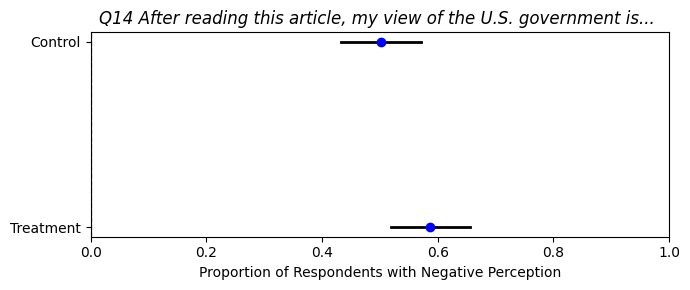

In [15]:
from scipy.stats import sem
import matplotlib.pyplot as plt

# Step 1: Compute means and standard errors for each group
group_stats_q14_nopos = df.groupby('group')['no_positive_support'].agg(['mean', sem]).reset_index()
group_stats_q14_nopos.columns = ['Group', 'Proportion', 'SE']
group_stats_q14_nopos['CI_low'] = group_stats_q14_nopos['Proportion'] - 1.96 * group_stats_q14_nopos['SE']
group_stats_q14_nopos['CI_high'] = group_stats_q14_nopos['Proportion'] + 1.96 * group_stats_q14_nopos['SE']
group_stats_q14_nopos['y'] = [1, 0]  # Treatment on top

# Step 2: Plot
plt.figure(figsize=(7, 3))
for _, row in group_stats_q14_nopos.iterrows():
    plt.plot([row['CI_low'], row['CI_high']], [row['y'], row['y']], color='black', lw=2)
    plt.plot(row['Proportion'], row['y'], 'o', color='blue')

plt.yticks([0, 1], group_stats_q14_nopos.sort_values('y')['Group'])
plt.axvline(0, color='gray', linestyle='--', linewidth=1)
plt.xlim(0, 1)
plt.xlabel("Proportion of Respondents with Negative Perception")
plt.title("Q14 After reading this article, my view of the U.S. government is... ", fontdict={'fontstyle': 'italic'})
plt.tight_layout()
plt.show()



Logistic Regression Results: no_support_policy (Q15)
                           Logit Regression Results                           
Dep. Variable:      no_support_policy   No. Observations:                  402
Model:                          Logit   Df Residuals:                      400
Method:                           MLE   Df Model:                            1
Date:                Tue, 15 Jul 2025   Pseudo R-squ.:                0.005539
Time:                        13:33:29   Log-Likelihood:                -255.82
converged:                       True   LL-Null:                       -257.24
Covariance Type:            nonrobust   LLR p-value:                   0.09139
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8544      0.154     -5.543      0.000      -1.157      -0.552
treatment      0.3568      0.212      1.684      0.092      -0.059       0.77

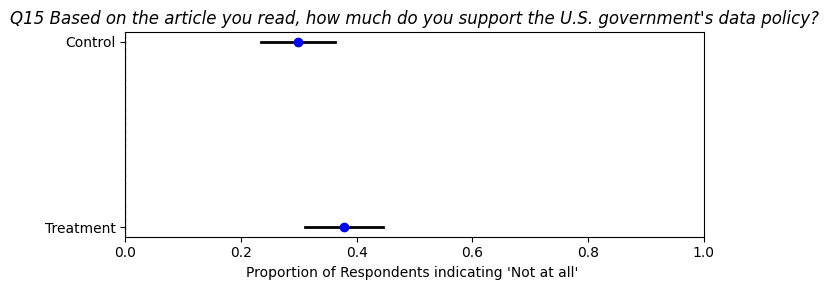

In [19]:
#Q15 Based on the article you read, how much do you support the U.S. government's data policy?

#Binary DV for lack of support for policy
no_support_levels = ['Not at all']
df['no_support_policy'] = df['Q15'].isin(no_support_levels).astype(int)

# Logistic regression
X = sm.add_constant(df['treatment'])
y = df['no_support_policy']
model_q15 = sm.Logit(y, X).fit(disp=0)

print("\nLogistic Regression Results: no_support_policy (Q15)")
print(model_q15.summary())

# Step 3: Descriptive stats
control_mean_q15 = df[df['treatment'] == 0]['no_support_policy'].mean()
treat_mean_q15 = df[df['treatment'] == 1]['no_support_policy'].mean()
print(f"\nProportion showing no/low support in control: {control_mean_q15:.2%}")
print(f"Proportion showing no/low support in treatment: {treat_mean_q15:.2%}")

# Coefficient plot for policy support
group_stats_q15 = df.groupby('group')['no_support_policy'].agg(['mean', sem]).reset_index()
group_stats_q15.columns = ['Group', 'Proportion', 'SE']
group_stats_q15['CI_low'] = group_stats_q15['Proportion'] - 1.96 * group_stats_q15['SE']
group_stats_q15['CI_high'] = group_stats_q15['Proportion'] + 1.96 * group_stats_q15['SE']
group_stats_q15['y'] = [1, 0]

plt.figure(figsize=(7, 3))
for _, row in group_stats_q15.iterrows():
    plt.plot([row['CI_low'], row['CI_high']], [row['y'], row['y']], color='black', lw=2)
    plt.plot(row['Proportion'], row['y'], 'o', color='blue')

plt.yticks([0, 1], group_stats_q15.sort_values('y')['Group'])
plt.axvline(0, color='gray', linestyle='--', linewidth=1)
plt.xlim(0, 1)
plt.xlabel("Proportion of Respondents indicating 'Not at all' ")
plt.title("Q15 Based on the article you read, how much do you support the U.S. government's data policy?", fontdict={'fontstyle': 'italic'})
plt.tight_layout()
plt.show()


In [20]:
# Create binary variables based on the numeric DV scores
df['DV1_home_gov'] = df['DV1'].astype(int).apply(lambda x: 1 if x <= 2 else 0)  # 1 = low support for home gov
df['DV2_speaker'] = df['DV2'].astype(int).apply(lambda x: 1 if x >= 3 else 0)  # 1 = support for speaker or low nationalism

df['treatment'] = df['FL_22_DO'].apply(lambda x: 1 if x == 'FL_24' else 0)

dv1_counts = df['DV1_home_gov'].value_counts(normalize=True)
dv2_counts = df['DV2_speaker'].value_counts(normalize=True)

dv1_counts, dv2_counts


(DV1_home_gov
 0    0.89801
 1    0.10199
 Name: proportion, dtype: float64,
 DV2_speaker
 1    0.527363
 0    0.472637
 Name: proportion, dtype: float64)